## 학습정리

### 6장. 확률
* 확률(probability) : 어떤 사건의 공간에서 특정 사건이 선택될 때 발생하는 불확실성을 수치적으로 나타냄
    * 다양한 모델을 만들 때 확률을 사용
    * 모델의 성능을 평가할 때 확률을 사용
    
#### 6.1 종속성과 독립성
* 종속사건(dependent events) : 사건 E의 발생 여부가 사건 F의 발생 여부에 대한 정보를 제공

* 그렇지 않다면 독립사건(independent events)
    * 독립일때 $P(E,F)=P(E)P(F)$

#### 6.2 조건부 확률
* 조건부 확률(conditional probability) : 사건 F가 발생했을 경우, 사건 E가 발생할 확률
    * $P(E|F)=P(E,F)/P(F)$
    * E,F 독립일 경우 : $P(E|F)=P(E)$
        * 사건 F가 발생해도 추가적인 정보를 알 수 없음
        
#### 6.3 베이즈 정리
* 베이즈 정리('Bayes's Theorem) 
    * $P(F)=P(F,E)+P(F,E^*)$
        * 사건 F : 사건 F와 사건 E가 모두 발생하는 경우($P(F,E)$) + 사건 F는 발생하지만 사건 E는 발생하지 않는 경우($P(F,E^*)$)
    * $P(E|F)=P(F|E)P(E)/[P(F|E)P(E)+P(F|E^*)P(E^*)]$

#### 6.4 확률변수
* 확률변수(random variable) : 측정 확률분포와 연관되어 있는 변수
    * 기댓값(expevted value) : 모든 확률변수의 확률을 해당 확률변수의 값으로 가중평균한 값

#### 6.5 연속분포
* 연속분포(continuous distribution) : 대부분의 경우 연속적인 결과에 대한 분포를 사용
    * ex) 균등 분포(uniform distribution) : 0과 1사이 모든 값에 동등한 비중을 준 분포
        * 0과 1 사이에는 무한히 많은 숫자가 존재하기 때문에, 숫자 하나의 비중이 0
            * 밀도 함수를 특정 구간에 적분해서 확률 밀도 함수(probability densitiy function, pdf)로 표현
        * 확률변수의 값이 특정 값보다 작거나 클 확률 
            * 누적 분포 함수(cumulative distribution function, cdf)
        
#### 6.6 정규분포
* 정규분포(normal distribution) : 종형 곡선 모양 분포 
    * 평균($\mu$) : 종의 중심이 어디인지 
    * 표준편차($\sigma$) : 종의 폭이 얼마나 넓은지
    * 정규분포의 밀도 함수 
        * $f(x|\mu,\sigma) = \frac{1}{\sqrt{2\pi}\sigma} exp(-\frac{(x-\mu)^2}{2\sigma^2})$

* 표준정규분포(standard normal distribution)은 \$mu=0$ 이고 $\sigma = 1$        
    
    * $X= \sigma Z+ \mu$
    * $Z = (X-\mu)/ \sigma$
    * 정규분포의 누적 분포 함수 : math.erf

#### 6.7 중심극한정리
* 중심극한정리(central limit theorem) : 동일한 분포에 대한 독립적인 확률변수의 평균을 나타내는 확률변수는 대략적으로 정규뷴포를 따른다
    * $(x_1+...+x_n)$을 평균 $\mu$와 표준 편차 $\sigma$를 갖는 확률변수 , n이 적당히 크다면
        * $\frac{1}{n} (x_1+...+x_n)$ 가 평균이 $\mu$,표준 편차가 $\frac{\sigma}{n}$인 정규분포와 비슷해짐
    * 이항 확률변수(binomial random variable) : n개의 독립적인 베르누이 확률변수(Bernoulli random variable)를 더한 것
        * n과 p(확률) 두가지 파라미터로 구성
        * 베르누이 확률변수의 평균 : $p$ , 표준편차 : $\sqrt{p(1-p)}$
        * 이항 확률변수의 평균 : $\mu=np$, 표준편차 : $\sigma = \sqrt{np(1-p)}$
        
#### 6.8 더 공부해 보고 싶다면
* scipy.stats : 유명한 확률분포의 확률밀도 함수와 누적 분포 함수를 구현해놓음

In [19]:
# 조건부 확률
import enum, random
# Enum을 사용하면 각 항목에 특정 값을 부여할 수 있으며
# 파이썬 코드를 더욱 깔끔하게 만들어 준다.
class Kid(enum.Enum) :
    BOY = 0
    GIRL = 1

def random_kid() -> Kid :
    return random.choice([Kid.BOY, Kid.GIRL])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)

for _ in range(10000) :
    younger = random_kid()
    older = random_kid()
    if older == Kid.GIRL :
        older_girl += 1
    if older == Kid.GIRL and younger == Kid.GIRL :
        both_girls += 1
    if older == Kid.GIRL or younger == Kid.GIRL :
        either_girl += 1
        
print("P(both | order):", both_girls / older_girl)   
print("P(both | either):", both_girls / either_girl) 

P(both | order): 0.5007089325501317
P(both | either): 0.3311897106109325


In [17]:
random_kid()

<Kid.BOY: 0>

In [21]:
# 균등 분포의 확률 밀도 함수
def uniform_pdf(x : float) -> float :
    return 1 if 0 <= x < 1 else 0 

# 균등 분포의 누적 분포 함수
def uniform_cdf(x : float) -> float :
    """균등 분포를 따르는 확률변수의 값이 x보다 작거나 같은 확률을 반환"""
    if x < 0 : return 0 # 균등 분포의 확률은 절대로 0보다 작을 수 없음
    elif x < 1 : return x # ex. P(X<=0.4) = 0.4
    else : return 1  # 균등 분포의 확률은 항상 1보다 작다 

In [22]:
# 정규분포의 밀도 함수 구현
import math
SQRT_TWO_PI = math.sqrt(2*math.pi)

def normal_pdf(x:float, mu:float = 0, sigma:float = 1) -> float :
    return (math.exp(-(x-mu)**2 / 2 / sigma**2) / (SQRT_TWO_PI*sigma))

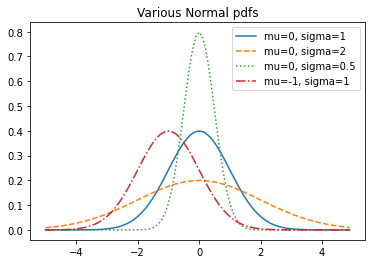

In [24]:
import matplotlib.pyplot as plt

xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_pdf(x,sigma=1) for x in xs], '-', label = 'mu=0, sigma=1')
plt.plot(xs, [normal_pdf(x,sigma=2) for x in xs], '--', label = 'mu=0, sigma=2')
plt.plot(xs, [normal_pdf(x,sigma=0.5) for x in xs], ':', label = 'mu=0, sigma=0.5')
plt.plot(xs, [normal_pdf(x,mu = -1) for x in xs], '-.', label = 'mu=-1, sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

In [25]:
# 정규분포의 누적 분포 함수 : math.erf
def normal_cdf(x : float, mu: float = 0, sigma: float = 1) -> float :
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma )) / 2


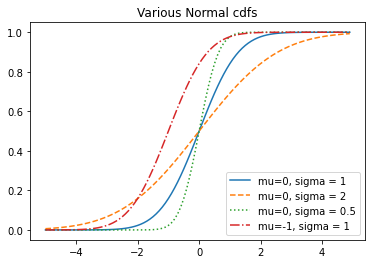

In [26]:
xs = [x / 10.0 for x in range(-50,50)]
plt.plot(xs, [normal_cdf(x,sigma= 1) for x in xs],'-',label = 'mu=0, sigma = 1')
plt.plot(xs, [normal_cdf(x,sigma= 2) for x in xs],'--',label = 'mu=0, sigma = 2')
plt.plot(xs, [normal_cdf(x,sigma= 0.5) for x in xs],':',label = 'mu=0, sigma = 0.5')
plt.plot(xs, [normal_cdf(x,mu = -1) for x in xs],'-.',label = 'mu=-1, sigma = 1')
plt.legend(loc=4) # bottom right
plt.title("Various Normal cdfs")
plt.show()

In [27]:
# 이진검색을 사용해 확률함수의 값 찾기
# 원하는 확률값에 가까워 질 때까지 표준정규분포의 구간을 반복적으로 이등분

def inverse_normal_cdf(p : float,
                      mu : float = 1,
                      sigma : float = 1,
                      tolerance : float = 0.00001) -> float :
    """이진 검색을 사용해서 역함수를 근사"""
    
    # 표준정규분포가 아니라면 표준정규분포로 변환
    if mu != 0 or sigma != 1:
        return mu + sigma*inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z = -10.0        # normal_cdf(-10)은 0에 근접
    hi_z = 10.0          # normal_cdf(10)은 0에 근접
    while hi_z - low_z > tolerance :
        mid_z = (low_z + hi_z) / 2  # 중간 값
        mid_p = normal_cdf(mid_z)   # 중간 값의 누적분포 값 계산
        if mid_p < p :
            low_z = mid_z           # 중간 값이 너무 작다면 더 큰 값들을 검색
        else :
            hi_z = mid_z            # 중간 값이 너무 크다면 더 작은 값들을 검색
    
    return mid_z
        

In [44]:
def bernoulli_trial(p:float)-> int :
    """p의 확률로 1을,1-p의 확률로 0을 반환"""
    return 1 if random.random() < p else 0

def binomial(n : int, p : float) -> int :
    """n개 bernoulli(p)의 합을 반환"""
    return sum(bernoulli_trial(p) for _ in range(n))

In [47]:
# 베르누이, 이항확률 분포

from collections import Counter

def binomial_histogram(p: float, n : int, num_points: int) -> None :
    """binomial(n,p)의 결괏값을 히스토그램으로 표현"""
    data = [ binomial(n,p) for _ in range(num_points)]
    
    # 이항분포의 표본을 막대 그래프로 표현
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
           [v / num_points for v in histogram.values()],
           0.8,
           color = '0.75')
    mu = p * n
    sigma = math.sqrt(n * p * ( 1 - p ))
    
    # 근사된 정규분포를 라인 차트로 표현
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i+ 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) for i in xs]
    
    plt.plot(xs, ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()

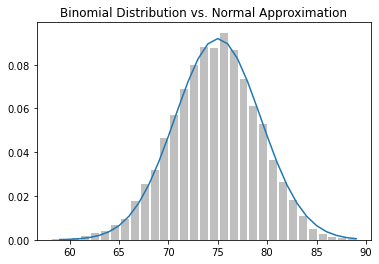

In [48]:
binomial_histogram(0.75,100,10000)